# **Titanic Data Analysis**

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')# Ignore all warnings
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

## **Loading Dataset**

In [2]:
train_df = pd.read_csv("../data/train.csv")
test_df = pd.read_csv('../data/test.csv')

###  **Displaying Tain Data Attributes Info** 

In [3]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


###  **Displaying Test Data Attributes Info** 

In [4]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


### **Displying The First 5 Rows**

In [5]:
train_df.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

### **Data Shape**

In [6]:
train_df.shape

(891, 12)

### **Data Info**

In [7]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### **Check for missing values**

In [8]:
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### **Categorical Columns**

In [9]:
categorical_columns = train_df.select_dtypes(include=['object']).columns.tolist()
categorical_columns

['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']

In [10]:
len(categorical_columns)

5

### **Display Statistics Of Numerical Data**

In [11]:
train_df.describe()

PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200

### **Display Statistics Of Categorical Data**

In [12]:
train_df.describe(include='object')

Name   Sex  Ticket    Cabin Embarked
count                       891   891     891      204      889
unique                      891     2     681      147        3
top     Braund, Mr. Owen Harris  male  347082  B96 B98        S
freq                          1   577       7        4      644

## **Descriptive Data Analysis**

### **Visualizing Categorical Data:** 
Let's visualize the survival rate, gender distribution, class distribution, and embarkation points.

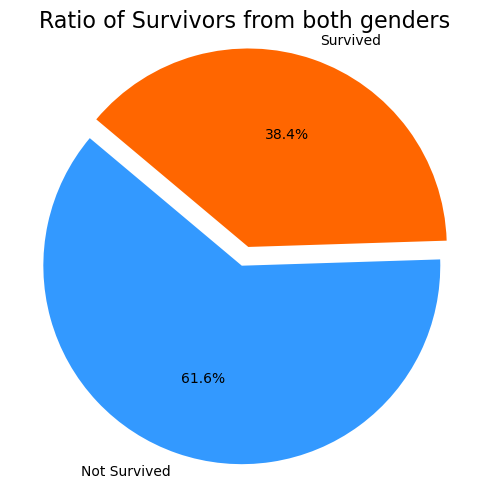

In [13]:
# Calculate percentage values
total = len(train_df)
value_counts = train_df['Survived'].value_counts()
percentages = value_counts / total * 100

# Define custom colors for each part
colors = ['#3399ff', '#ff6600']

# Define the amount of space between the parts
explode = (0.1, 0)

# Define custom labels for the parts
labels = ['Not Survived','Survived']

# Create a pie chart
plt.figure(figsize=(5, 5))  # Adjust the figure size if needed
plt.pie(
    percentages,
    autopct=lambda p: f'{p:.1f}%',
    startangle=140,
    colors=colors,  # Use custom colors
    explode=explode,  # Add space between parts
    labels=labels,  # Add labels
)

# Equal aspect ratio ensures that pie is drawn as a circle.
plt.axis('equal')

# Update the title
plt.title("Ratio of Survivors from both genders", fontsize=16)

# Show the plot
plt.tight_layout()
plt.show()


### **What is the relationship between the `Sex` and `Survived`?**

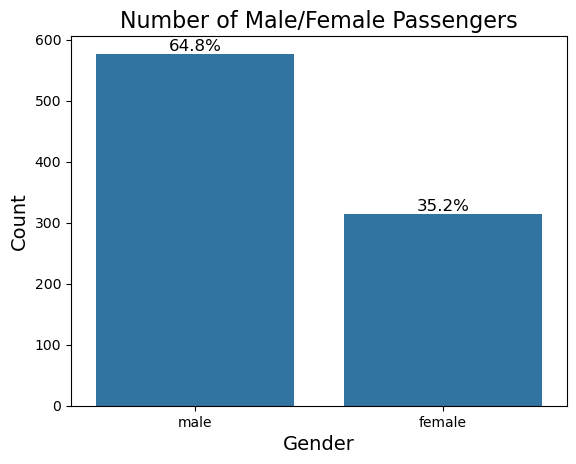

In [14]:
# Create the count plot
b = sns.countplot(x='Sex', data=train_df)
b.axes.set_title('Number of Male/Female Passengers', fontsize=16)
b.set_xlabel("Gender", fontsize=14)
b.set_ylabel("Count", fontsize=14)

# Calculate total counts for percentage calculation
total = len(train_df)

# Add percentage labels above each bar
for p in b.patches:
    height = p.get_height()
    percentage = (height / total) * 100  # Calculate percentage
    b.annotate(f'{percentage:.1f}%', 
                (p.get_x() + p.get_width() / 2., height), 
                ha='center', va='bottom', fontsize=12)

# Show the plot
plt.show()


* **`64.8%` of the passengers are male, while `35.2%` are female on the titanic ship.**

### **Survival Count by Gender**

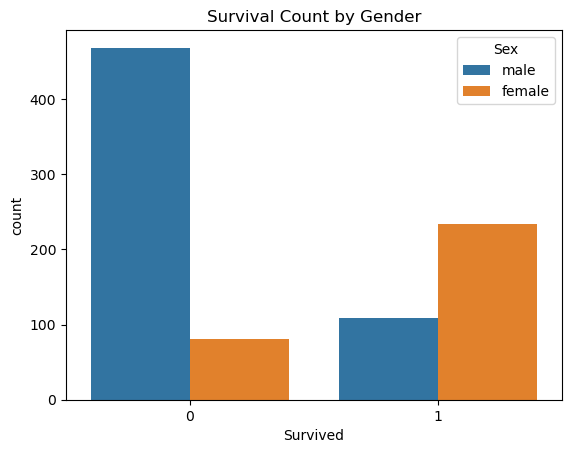

In [15]:
sns.countplot(x='Survived', hue='Sex', data=train_df)
plt.title('Survival Count by Gender')
plt.show()

* **Female Survival:** A significantly higher number of females survived compared to males. This is evident from the larger blue portion of the "Survived" bar, which represents the count of female survivors.
* **Male Mortality:** A larger proportion of males perished compared to females. This is reflected in the taller orange portion of the "Dead" bar, representing the count of male fatalities.

### **Survival Count by Ticket Class**

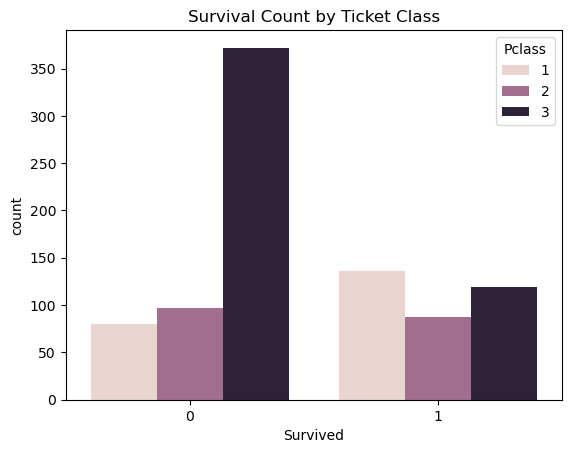

In [16]:
sns.countplot(x='Survived', hue='Pclass', data=train_df)
plt.title('Survival Count by Ticket Class')
plt.show()

* **Insights:**
    * **The majority of passengers in the first class survived, with a much smaller number of fatalities.**
    * **A larger proportion of passengers in the second and third classes perished, with a relatively small number of survivors.**

* **several factors could have contributed to this disparity:**

    * `Safety Features:` Passengers in the first class may have had access to better safety features or were located in safer areas of the ship.
    * `Priority Treatment:` Passengers in the first class may have been given priority treatment during the evacuation process.
    * `Socioeconomic Status:` Passengers in the first class were likely from higher socioeconomic backgrounds, which may have given them an advantage in terms of access to resources and information during the crisis.

### **Passenger Count by Embarkation Point**

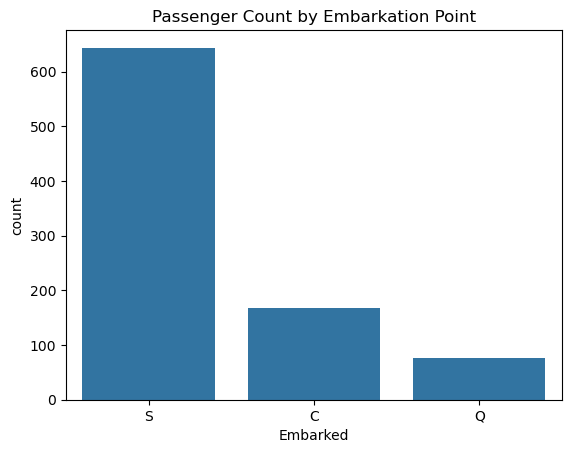

In [17]:
sns.countplot(x='Embarked', data=train_df)
plt.title('Passenger Count by Embarkation Point')
plt.show()

* **As we can see:**
    * **Embarkation Point Distribution:** The majority of passengers embarked from Southampton (S), followed by Cherbourg (C) and Queenstown (Q).
    * **Southampton Dominance:** Southampton was the most popular embarkation point, with nearly three times as many passengers boarding from there compared to Cherbourg and Queenstown combined.
    * **Cherbourg and Queenstown:** Cherbourg and Queenstown had a relatively similar number of passengers embarking from each port.

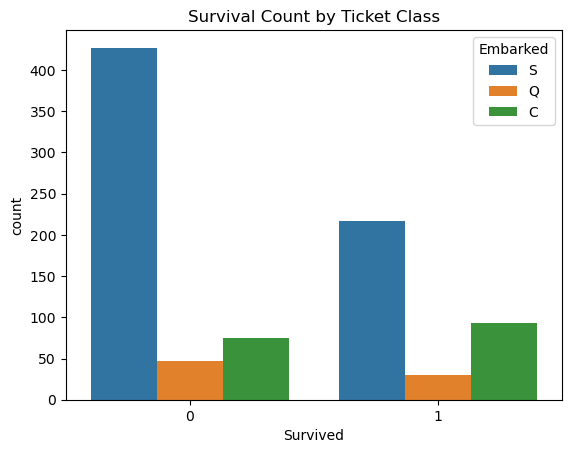

In [18]:
sns.countplot(x='Survived', hue='Embarked', data=train_df)
plt.title('Survival Count by Ticket Class')
plt.show()

**We can see that:**
* **Embarkation Point Influence:** The embarkation point also played a role in survival. Passengers who embarked from Southampton (S) tended to have lower survival rates compared to those who embarked from Cherbourg (C) or Queenstown (Q).
* **Southampton and Queenstown:** Passengers who embarked from Southampton (S) and Queenstown (Q) had similar survival rates, while those who embarked from Cherbourg (C) generally had higher survival rates.

**This can lead us to think of:**
* **Embarkation Point Factors:** The embarkation point may have influenced factors such as the types of passengers who boarded the ship, the order in which passengers were loaded onto the ship, and the proximity of the embarkation point to lifeboats.

### **Analyzing Numerical Data:**
We'll visualize the distribution of age and fare.

### **Age Distribution by Survival**

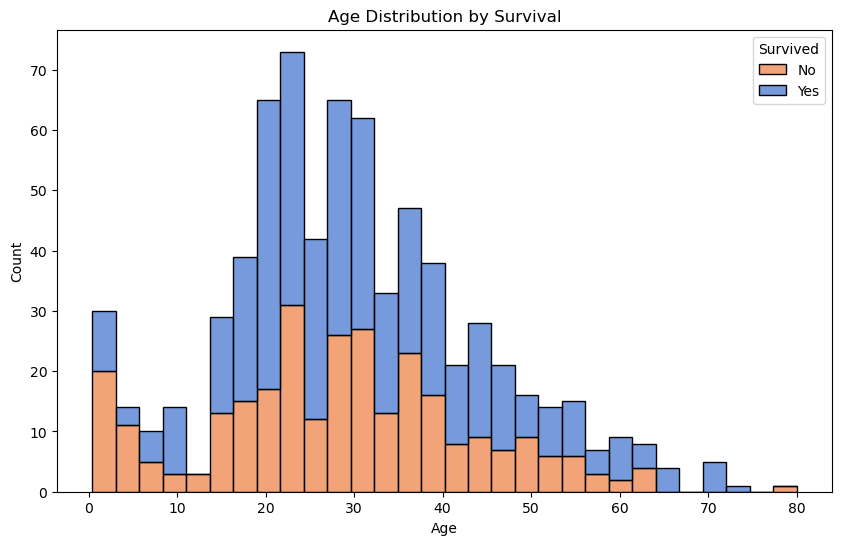

In [19]:
plt.figure(figsize=(10, 6))
sns.histplot(data=train_df, x='Age', hue='Survived', multiple='stack', palette='muted', bins=30)
plt.title('Age Distribution by Survival')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()

### **Fare distribution**


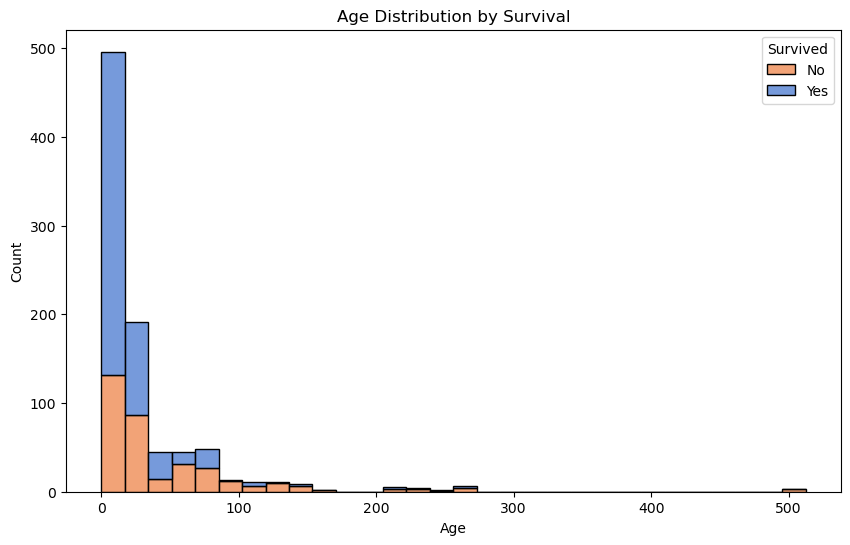

In [20]:
plt.figure(figsize=(10, 6))
sns.histplot(data=train_df, x='Fare', hue='Survived', multiple='stack', palette='muted', bins=30)
plt.title('Age Distribution by Survival')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()

#### **Fare Distribution by Passenger Class**

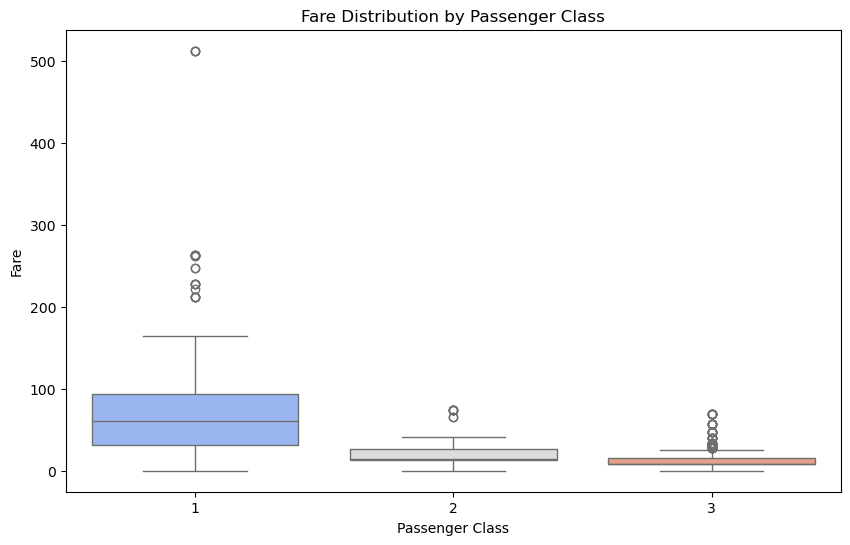

In [21]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Pclass', y='Fare', data=train_df, palette='coolwarm')
plt.title('Fare Distribution by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Fare')
plt.show()

## **Data Preprocessing**

### **Feature Engineering**

* Create a `FamilySize` feature based on `SibSp` and `Parch`

In [22]:
train_df['FamilySize'] = train_df['SibSp'] + train_df['Parch']
test_df['FamilySize'] = test_df['SibSp'] + test_df['Parch']

#### **Survival Rate by Number of FamilySize Aboard**

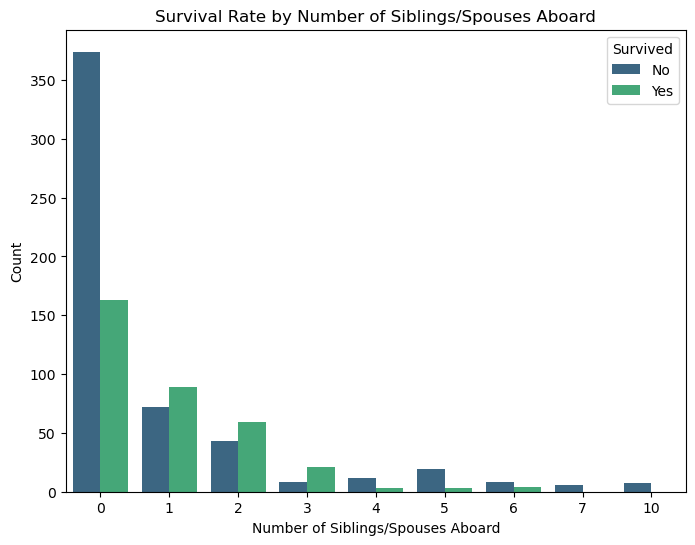

In [23]:
plt.figure(figsize=(8, 6))
sns.countplot(x='FamilySize', hue='Survived', data=train_df, palette='viridis')
plt.title('Survival Rate by Number of Siblings/Spouses Aboard')
plt.xlabel('Number of Siblings/Spouses Aboard')
plt.ylabel('Count')
plt.legend(title='Survived', loc='upper right', labels=['No', 'Yes'])
plt.show()

#### **Lests extract the `Title` of every passenger on the ship `(Mr,Miss,...etc)`**

In [24]:
train_df['Title'] = train_df['Name'].str.extract(r' ([A-Za-z]+)\.', expand=False)
test_df['Title'] = test_df['Name'].str.extract(r' ([A-Za-z]+)\.', expand=False)

### **Handling Missing Values**

**Lets fill missing values for Age, Fare, and Embarked**

#### **Fill missing Age values with median Age based on Title**

In [25]:
train_df["Age"] = train_df["Age"].fillna(train_df['Age'].median())
test_df["Age"] = test_df["Age"].fillna(test_df['Age'].median())

#### **Fill missing Fare values with median Fare based on Title**

In [26]:
train_df["Fare"] = train_df["Fare"].fillna(train_df['Fare'].median())
test_df["Fare"] = test_df["Fare"].fillna(test_df['Fare'].median())

**Note:** The survival rate appears to be higher for passengers who paid higher fares. The peak of the density curve for survivors is shifted towards the higher fare range `(around 10-15)`, while the peak for non-survivors is lower and shifted towards the lower fare range `(around 0-5)`.

#### **Filli missing values with the most appropriate value**

In [27]:
train_df['Embarked'] = train_df['Embarked'].fillna(train_df['Embarked'].mode()[0])
test_df['Embarked'] = test_df['Embarked'].fillna(test_df['Embarked'].mode()[0])

#### **Data encoding**
* Convert categorical features to numeric

In [28]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
train_df['Sex'] = label.fit_transform(train_df['Sex'])
train_df['Embarked'] = label.fit_transform(train_df['Embarked'])
train_df['Title'] = label.fit_transform(train_df['Title'])

test_df['Sex'] = label.fit_transform(test_df['Sex'])
test_df['Embarked'] = label.fit_transform(test_df['Embarked'])
test_df['Title'] = label.fit_transform(test_df['Title'])

#### **Drop Unnessary Features**
* **Ticket**
* **Name**
* **PassengerId**
* **Cabin**: as it has alot of missing values.

In [29]:
train_df = train_df.drop(columns=['Ticket', 'Name','PassengerId','Cabin','SibSp','Parch'])
test_df = test_df.drop(columns=['Ticket', 'Name','Cabin','SibSp','Parch'])

In [30]:
train_df.head()

Survived  Pclass  Sex   Age     Fare  Embarked  FamilySize  Title
0         0       3    1  22.0   7.2500         2           1     12
1         1       1    0  38.0  71.2833         0           1     13
2         1       3    0  26.0   7.9250         2           0      9
3         1       1    0  35.0  53.1000         2           1     13
4         0       3    1  35.0   8.0500         2           0     12

## **Modeling**

* let visualize the heatmap which shows the coorelation of the vatiables

In [31]:
corr_matrix = train_df.corr()

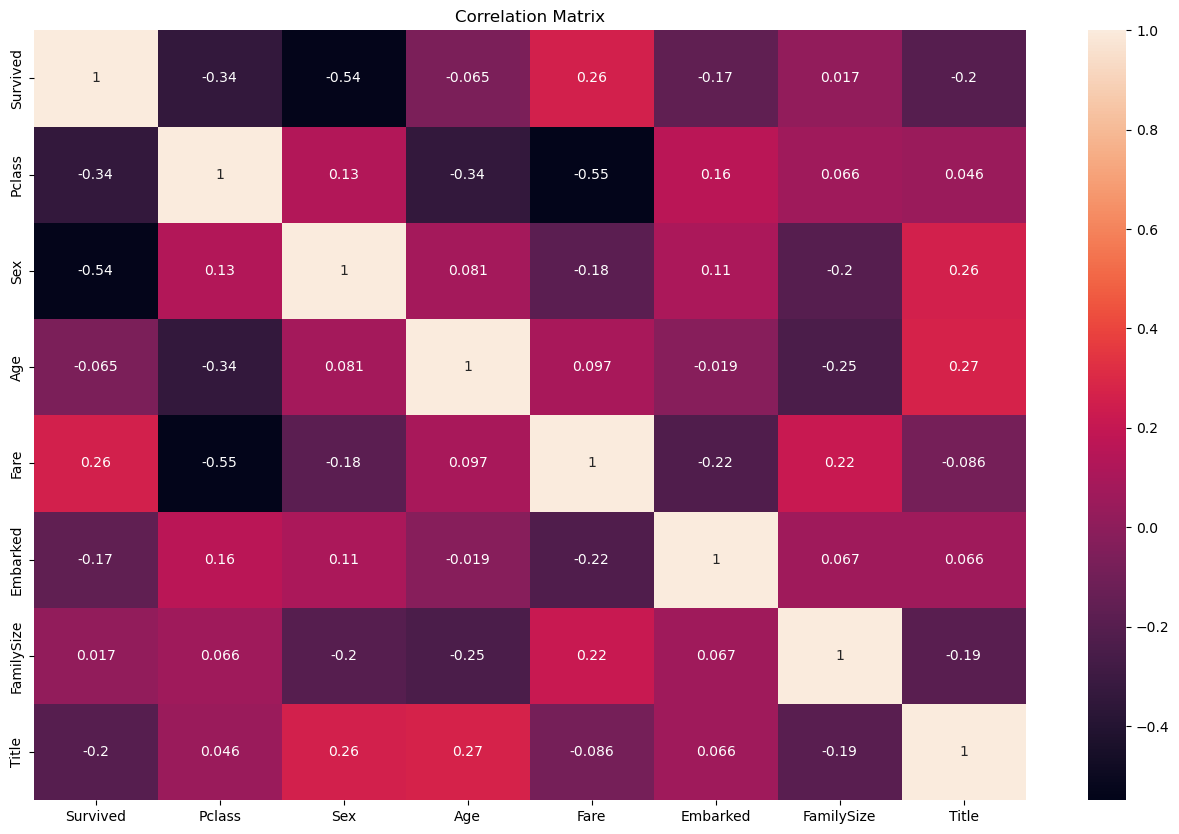

In [32]:
plt.figure(figsize=(16,10))
sns.heatmap(corr_matrix, annot=True)
plt.title("Correlation Matrix")
plt.show()

In [33]:
train_df.shape

(891, 8)

In [34]:
# Preprocess the data
X_train = train_df.drop(columns=['Survived'])
y_train = train_df['Survived']
X_test = test_df.drop(columns=['PassengerId'])

In [35]:
X_test.head()

Pclass  Sex   Age     Fare  Embarked  FamilySize  Title
0       3    1  34.5   7.8292         1           0      5
1       3    0  47.0   7.0000         2           1      6
2       2    1  62.0   9.6875         1           0      5
3       3    1  27.0   8.6625         2           0      5
4       3    0  22.0  12.2875         2           2      6

In [36]:
# Build and train the model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [37]:
# Make predictions
predictions = model.predict(X_test)

In [38]:
# Prepare the submission file
submission = pd.DataFrame({'PassengerId': test_df['PassengerId'], 'Survived': predictions})
submission.to_csv('submission0.csv', index=False)
print("Submission file created successfully!")

Submission file created successfully!


In [39]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.metrics import accuracy_score


def train_binary_classification_model(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, shuffle=True, random_state=42)

    model1 = LogisticRegression()
    model2 = MultinomialNB()
    model3 = BaggingClassifier()
    model4 = DecisionTreeClassifier()
    model5 = LinearSVC()
    model6 = SGDClassifier()
    model7 = KNeighborsClassifier()
    model8 = RandomForestClassifier()
    model9 = GradientBoostingClassifier()
    model10 = SVC()

    models = [model1, model2, model3, model4, model5, model6, model7, model8, model9, model10 ]
    model_name_list = ['LogisticRegression', 'MultinomialNB', 'BaggingClassifier', 'DecisionTreeClassifier',
           'LinearSVC', 'SGDClassifier', 'KNeighborsClassifier', 'RandomForestClassifier', 'GradientBoostingClassifier','SVC']

    # Dataframe for results
    results = pd.DataFrame(columns=["Test Accuracy", "Train Accuracy"], index=model_name_list)

    for i, model in enumerate(models):
        # Train the model
        model.fit(X_train, y_train)

        # Make predictions on the test set
        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)

        # Calculate evaluation metrics
        accuracy = accuracy_score(y_test, y_test_pred)
        accuracy_train = accuracy_score(y_train, y_train_pred)



        model_name = model_name_list[i]
        results.loc[model_name, :] = [accuracy, accuracy_train ]

    return results

In [40]:
train_binary_classification_model(X_train,y_train)

Test Accuracy Train Accuracy
LogisticRegression              0.833333       0.797753
MultinomialNB                   0.711111       0.679151
BaggingClassifier               0.844444        0.96005
DecisionTreeClassifier               0.8       0.980025
LinearSVC                       0.877778       0.785268
SGDClassifier                   0.633333       0.657928
KNeighborsClassifier            0.777778       0.805243
RandomForestClassifier          0.844444       0.980025
GradientBoostingClassifier      0.822222       0.897628
SVC                             0.677778       0.682896

In [60]:
model = BaggingClassifier()
model.fit(X_train, y_train)
predictions = model.predict(X_test)

In [61]:
# Prepare the submission file
submission = pd.DataFrame({'PassengerId': test_df['PassengerId'], 'Survived': predictions})
submission.to_csv('submission1.csv', index=False)
print("Submission file created successfully!")

Submission file created successfully!


lets do some feature engineering

In [43]:
train_df2 = train_df.copy()
test_df2 = test_df.copy()

Combine Pclass and Fare: Create a feature that captures the wealth or socioeconomic status of passengers.

In [44]:
train_df2['Fare_Per_Class'] = train_df['Fare'] / train_df['Pclass']

In [45]:
test_df2['Fare_Per_Class'] = test_df['Fare'] / test_df['Pclass']

Bucketize Fare: Create a new categorical feature for fare buckets (e.g., low, medium, high).

In [46]:
train_df2['Fare_Bucket'] = pd.qcut(train_df2['Fare'], 4, labels=False)  # Quartiles
test_df2['Fare_Bucket'] = pd.qcut(test_df2['Fare'], 4, labels=False)  # Quartiles

In [47]:
train_df2.head()

Survived  Pclass  Sex   Age     Fare  Embarked  FamilySize  Title  \
0         0       3    1  22.0   7.2500         2           1     12   
1         1       1    0  38.0  71.2833         0           1     13   
2         1       3    0  26.0   7.9250         2           0      9   
3         1       1    0  35.0  53.1000         2           1     13   
4         0       3    1  35.0   8.0500         2           0     12   

   Fare_Per_Class  Fare_Bucket  
0        2.416667            0  
1       71.283300            3  
2        2.641667            1  
3       53.100000            3  
4        2.683333            1

In [48]:
test_df2.head()

PassengerId  Pclass  Sex   Age     Fare  Embarked  FamilySize  Title  \
0          892       3    1  34.5   7.8292         1           0      5   
1          893       3    0  47.0   7.0000         2           1      6   
2          894       2    1  62.0   9.6875         1           0      5   
3          895       3    1  27.0   8.6625         2           0      5   
4          896       3    0  22.0  12.2875         2           2      6   

   Fare_Per_Class  Fare_Bucket  
0        2.609733            0  
1        2.333333            0  
2        4.843750            1  
3        2.887500            1  
4        4.095833            1

In [49]:
train_df2['IsAlone'] = (train_df2['FamilySize'] == 0).astype(int)
test_df2['IsAlone'] = (test_df2['FamilySize'] == 0).astype(int)

In [50]:
train_df2['Sex_Pclass'] = train_df2['Sex'] * train_df2['Pclass']
test_df2['Sex_Pclass'] = test_df2['Sex'] * test_df2['Pclass']

In [51]:
corr_matrix = train_df2.corr()

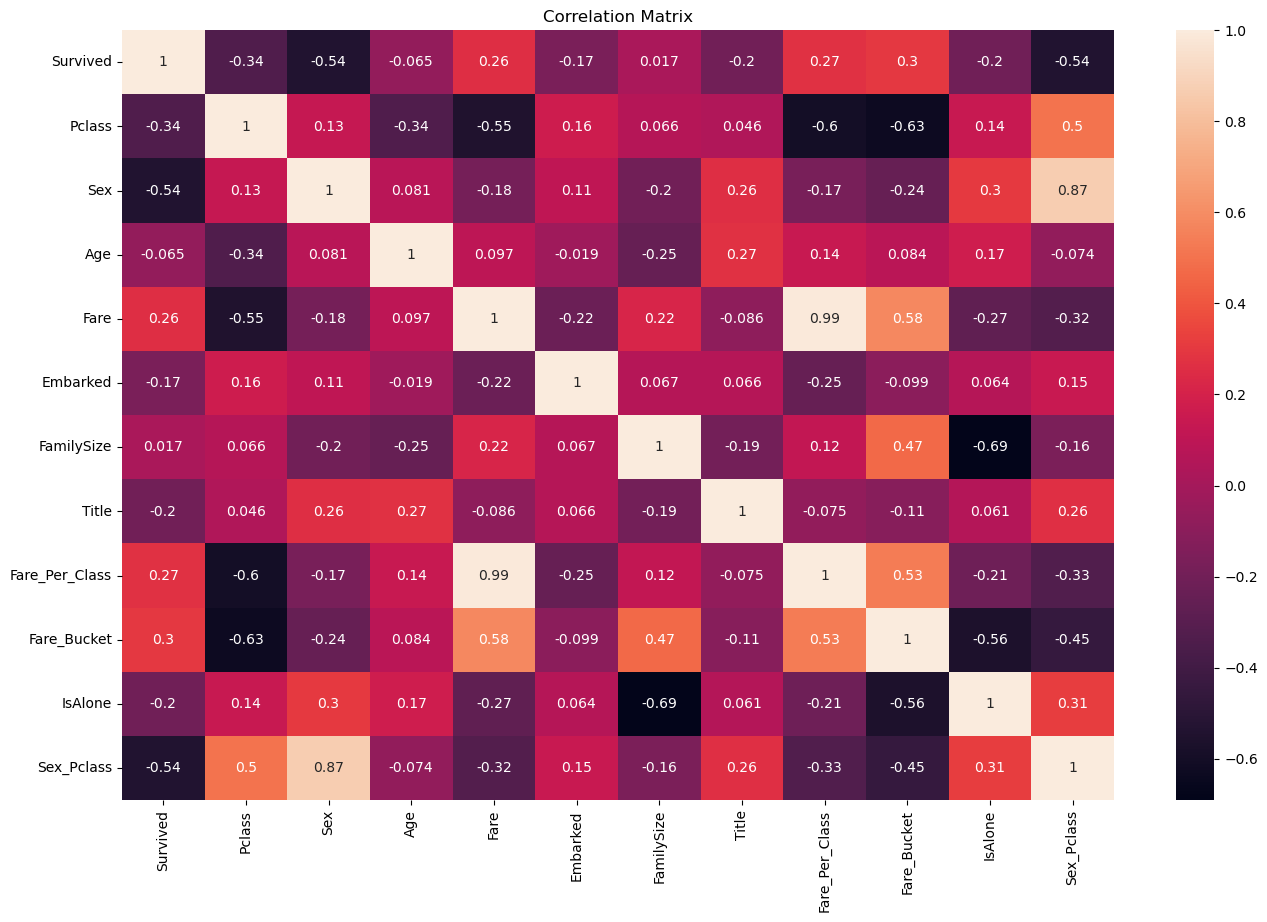

In [52]:
plt.figure(figsize=(16,10))
sns.heatmap(corr_matrix, annot=True)
plt.title("Correlation Matrix")
plt.show()

In [53]:
X_train1 = train_df2.drop(columns=['Survived'])
y_train1 = train_df2['Survived']
X_test1 = test_df2.drop(columns=['PassengerId'])

In [54]:
X_train1.head()

Pclass  Sex   Age     Fare  Embarked  FamilySize  Title  Fare_Per_Class  \
0       3    1  22.0   7.2500         2           1     12        2.416667   
1       1    0  38.0  71.2833         0           1     13       71.283300   
2       3    0  26.0   7.9250         2           0      9        2.641667   
3       1    0  35.0  53.1000         2           1     13       53.100000   
4       3    1  35.0   8.0500         2           0     12        2.683333   

   Fare_Bucket  IsAlone  Sex_Pclass  
0            0        0           3  
1            3        0           0  
2            1        1           0  
3            3        0           0  
4            1        1           3

In [55]:
X_test1.head()

Pclass  Sex   Age     Fare  Embarked  FamilySize  Title  Fare_Per_Class  \
0       3    1  34.5   7.8292         1           0      5        2.609733   
1       3    0  47.0   7.0000         2           1      6        2.333333   
2       2    1  62.0   9.6875         1           0      5        4.843750   
3       3    1  27.0   8.6625         2           0      5        2.887500   
4       3    0  22.0  12.2875         2           2      6        4.095833   

   Fare_Bucket  IsAlone  Sex_Pclass  
0            0        1           3  
1            0        0           0  
2            1        1           2  
3            1        1           3  
4            1        0           0

In [56]:
train_binary_classification_model(X_train1,y_train1)

Test Accuracy Train Accuracy
LogisticRegression              0.822222       0.797753
MultinomialNB                   0.722222       0.682896
BaggingClassifier               0.855556       0.958801
DecisionTreeClassifier          0.811111       0.980025
LinearSVC                       0.766667       0.779026
SGDClassifier                        0.6       0.617978
KNeighborsClassifier            0.777778       0.820225
RandomForestClassifier          0.844444       0.980025
GradientBoostingClassifier      0.833333       0.912609
SVC                             0.744444       0.684145

In [62]:
model1 = BaggingClassifier()
model1.fit(X_train1, y_train1)

BaggingClassifier()

In [63]:
predictions = model1.predict(X_test1)

In [64]:
# # Prepare the submission file
submission = pd.DataFrame({'PassengerId': test_df['PassengerId'], 'Survived': predictions})
submission.to_csv('submission2.csv', index=False)
print("Submission file created successfully!")

Submission file created successfully!
